In [ ]:
import os
import random
import shutil
from pathlib import Path
import pandas as pd
from sklearn import model_selection
from PIL import Image
import matplotlib.pyplot as plt


base_train_path = Path('L:/final_project_ia377/data/train/')
base_valid_path = Path('L:/final_project_ia377/data/valid/')

for i in range(5): 
    (base_valid_path / str(i)).mkdir(parents=True, exist_ok=True)

for dir in base_train_path.iterdir():
    if dir.is_dir():
        images = list(dir.glob('*.jpg'))
        selected_images = random.sample(images, 500)
        for image in selected_images:
            shutil.move(str(image), str(base_valid_path / dir.name))


In [16]:
DATA_PATH = "L:/final_project_ia377"

df = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))

train_df, valid_df = model_selection.train_test_split(
    df, test_size=0.1, random_state=42, stratify=df.label.values
)

In [17]:
def delete_corrupted_images(folder_path):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            file_path = os.path.join(folder_path, filename)
            try:
                with Image.open(file_path) as img:
                    img.verify()  
            except (IOError, SyntaxError) as e:
                print(f'Deleting corrupted image: {file_path}')
                os.remove(file_path)

folder_path = 'L:/final_project_ia377/train_images'
delete_corrupted_images(folder_path)

Deleting corrupted image: L:/final_project_ia377/train_images\520827506.jpg
Deleting corrupted image: L:/final_project_ia377/train_images\520992069.jpg
Deleting corrupted image: L:/final_project_ia377/train_images\521262022.jpg
Deleting corrupted image: L:/final_project_ia377/train_images\522043720.jpg
Deleting corrupted image: L:/final_project_ia377/train_images\522172661.jpg
Deleting corrupted image: L:/final_project_ia377/train_images\522209459.jpg
Deleting corrupted image: L:/final_project_ia377/train_images\522535695.jpg
Deleting corrupted image: L:/final_project_ia377/train_images\522793998.jpg
Deleting corrupted image: L:/final_project_ia377/train_images\522854384.jpg
Deleting corrupted image: L:/final_project_ia377/train_images\523005537.jpg
Deleting corrupted image: L:/final_project_ia377/train_images\523032468.jpg
Deleting corrupted image: L:/final_project_ia377/train_images\523149736.jpg
Deleting corrupted image: L:/final_project_ia377/train_images\523201478.jpg
Deleting cor

In [18]:
train_src_dir = r'L:/final_project_ia377/train_images'

train_dest_dir = r'L:/final_project_ia377/data/train'
valid_dest_dir = r'L:/final_project_ia377/data/valid'

# Function to create directories and subdirectories
def create_directories(base_dir, labels):
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
    for label in labels:
        dir_path = os.path.join(base_dir, str(label))
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)

def copy_images(df, src_dir, dest_dir):
    for index, row in df.iterrows():
        try:
            file_name = row['image_id']
            label = row['label']
            sub_dir = os.path.join(dest_dir, str(label))
            src_file = os.path.join(src_dir, file_name)
            dest_file = os.path.join(sub_dir, file_name)
            copy2(src_file, dest_file)
        except FileNotFoundError:
            print(f"File not found: {src_file}")
        except Exception as e:
            print(f"Error processing file {src_file}: {e}")

# Create the directories
labels = train_df['label'].unique()
create_directories(train_dest_dir, labels)

copy_images(train_df, train_src_dir, train_dest_dir)
copy_images(valid_df, train_src_dir, valid_dest_dir)

# Output the structure of the directories
os.listdir(train_dest_dir), os.listdir(valid_dest_dir)

File not found: L:/final_project_ia377/train_images\681211585.jpg
File not found: L:/final_project_ia377/train_images\612223117.jpg
File not found: L:/final_project_ia377/train_images\825340900.jpg
File not found: L:/final_project_ia377/train_images\622186063.jpg
File not found: L:/final_project_ia377/train_images\813017538.jpg
File not found: L:/final_project_ia377/train_images\548717343.jpg
File not found: L:/final_project_ia377/train_images\632357010.jpg
File not found: L:/final_project_ia377/train_images\921830074.jpg
File not found: L:/final_project_ia377/train_images\860785504.jpg
File not found: L:/final_project_ia377/train_images\658395701.jpg
File not found: L:/final_project_ia377/train_images\757527381.jpg
File not found: L:/final_project_ia377/train_images\909032861.jpg
File not found: L:/final_project_ia377/train_images\646796085.jpg
File not found: L:/final_project_ia377/train_images\61044687.jpg
File not found: L:/final_project_ia377/train_images\690564008.jpg
File not fo

(['0', '1', '2', '3', '4'], ['0', '1', '2', '3', '4'])

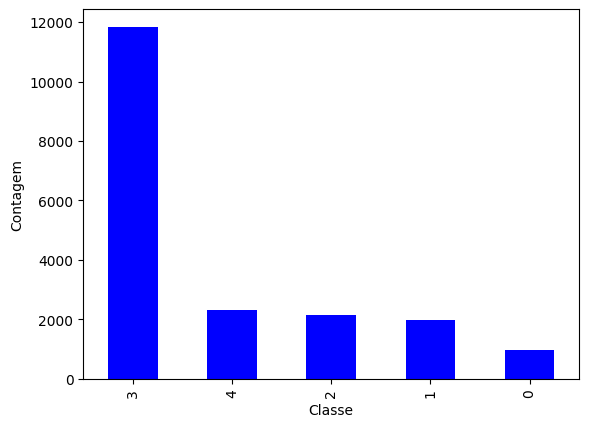

In [23]:
value_counts = train_df['label'].value_counts()
ax = value_counts.plot(kind="bar", color='blue')  # Define a cor das barras como azul
ax.set_facecolor('white')  # Define o fundo do gráfico como branco
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.show()